In [14]:
 ! pip install -q kaggle

In [15]:
 ! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [16]:
! cp kaggle.json ~/.kaggle/

In [17]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [18]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [01:49<00:00, 19.9MB/s]
100% 2.29G/2.29G [01:49<00:00, 22.5MB/s]


In [19]:
!unzip /content/chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import numpy as np
import pandas as pd
from PIL import Image
from glob import glob
import tensorflow as tf

In [21]:
main_path = "/content/chest_xray"

train_normal = glob(os.path.join(main_path, "train", "NORMAL", "*.jpeg"))
train_pneumonia = glob(os.path.join(main_path, "train", "PNEUMONIA", "*.jpeg"))

test_normal = glob(os.path.join(main_path, "test", "NORMAL", "*.jpeg"))
test_pneumonia = glob(os.path.join(main_path, "test", "PNEUMONIA", "*.jpeg"))

val_normal = glob(os.path.join(main_path, "val", "NORMAL", "*.jpeg"))
val_pneumonia = glob(os.path.join(main_path, "val", "PNEUMONIA", "*.jpeg"))


df_train = pd.DataFrame({
    'class': ['Normal'] * len(train_normal) + ['Pneumonia'] * len(train_pneumonia),
    'image': train_normal + train_pneumonia
})

df_test = pd.DataFrame({
    'class': ['Normal'] * len(test_normal) + ['Pneumonia'] * len(test_pneumonia),
    'image': test_normal + test_pneumonia
})

df_val = pd.DataFrame({
    'class': ['Normal'] * len(val_normal) + ['Pneumonia'] * len(val_pneumonia),
    'image': val_normal + val_pneumonia
})


In [22]:
df_train

,class,image
0,Normal,/content/chest_xray/train/NORMAL/IM-0203-0001....
1,Normal,/content/chest_xray/train/NORMAL/IM-0180-0001....
2,Normal,/content/chest_xray/train/NORMAL/IM-0620-0001-...
3,Normal,/content/chest_xray/train/NORMAL/NORMAL2-IM-12...
4,Normal,/content/chest_xray/train/NORMAL/IM-0501-0001-...
...,...,...
5211,Pneumonia,/content/chest_xray/train/PNEUMONIA/person569_...
5212,Pneumonia,/content/chest_xray/train/PNEUMONIA/person427_...
5213,Pneumonia,/content/chest_xray/train/PNEUMONIA/person392_...
5214,Pneumonia,/content/chest_xray/train/PNEUMONIA/person274_...


In [23]:
df_test

,class,image
0,Normal,/content/chest_xray/test/NORMAL/NORMAL2-IM-012...
1,Normal,/content/chest_xray/test/NORMAL/NORMAL2-IM-022...
2,Normal,/content/chest_xray/test/NORMAL/NORMAL2-IM-027...
3,Normal,/content/chest_xray/test/NORMAL/NORMAL2-IM-024...
4,Normal,/content/chest_xray/test/NORMAL/IM-0084-0001.jpeg
...,...,...
619,Pneumonia,/content/chest_xray/test/PNEUMONIA/person108_b...
620,Pneumonia,/content/chest_xray/test/PNEUMONIA/person49_vi...
621,Pneumonia,/content/chest_xray/test/PNEUMONIA/person139_b...
622,Pneumonia,/content/chest_xray/test/PNEUMONIA/person141_b...


In [24]:
import pandas as pd

df_train = pd.concat([df_train, df_val], axis=0)

# Reset the index
df_train = df_train.reset_index(drop=True)

In [25]:
df_train

,class,image
0,Normal,/content/chest_xray/train/NORMAL/IM-0203-0001....
1,Normal,/content/chest_xray/train/NORMAL/IM-0180-0001....
2,Normal,/content/chest_xray/train/NORMAL/IM-0620-0001-...
3,Normal,/content/chest_xray/train/NORMAL/NORMAL2-IM-12...
4,Normal,/content/chest_xray/train/NORMAL/IM-0501-0001-...
...,...,...
5227,Pneumonia,/content/chest_xray/val/PNEUMONIA/person1946_b...
5228,Pneumonia,/content/chest_xray/val/PNEUMONIA/person1950_b...
5229,Pneumonia,/content/chest_xray/val/PNEUMONIA/person1951_b...
5230,Pneumonia,/content/chest_xray/val/PNEUMONIA/person1949_b...


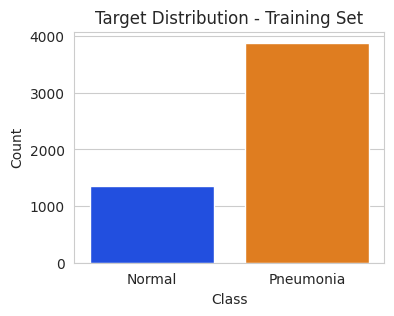

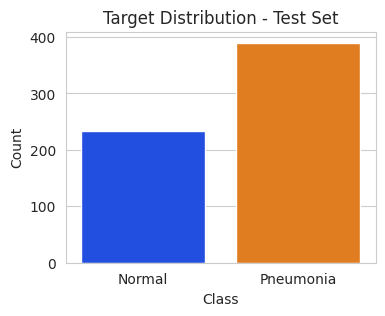

In [26]:
sns.set_palette("bright")
sns.set_style("whitegrid")

# Plotting target distribution in the training set
plt.figure(figsize=(4, 3))
sns.countplot(data=df_train, x='class')
plt.title('Target Distribution - Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Plotting target distribution in the test set
plt.figure(figsize=(4, 3))
sns.countplot(data=df_test, x='class')
plt.title('Target Distribution - Test Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

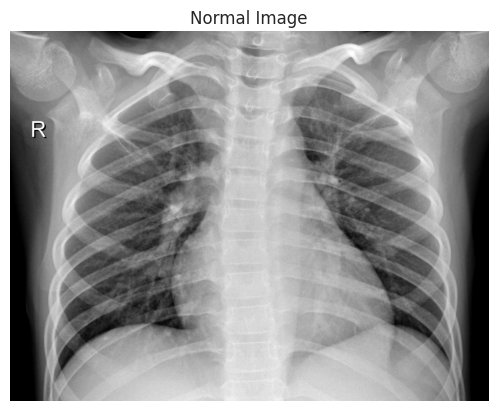

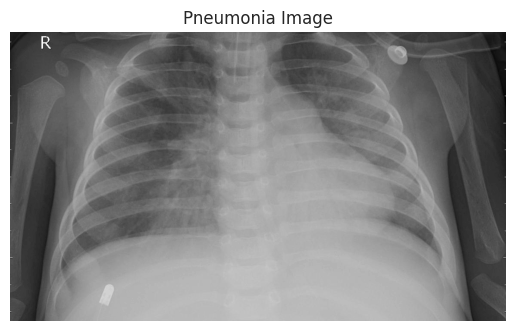

In [27]:
image_path1 = df_train['image'][1]
try:
    image1 = Image.open(image_path1)
    plt.imshow(image1, cmap='gray')
    plt.title('Normal Image')
    plt.axis('off')
    plt.show()
except (IOError, OSError) as e:
    print(f"Error opening image: {e}")

image_path2 = df_train['image'][5110]
try:
    image2 = Image.open(image_path2)
    plt.imshow(image2, cmap='gray')
    plt.title('Pneumonia Image')
    plt.axis('off')
    plt.show()
except (IOError, OSError) as e:
    print(f"Error opening image: {e}")

In [28]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = 42, stratify = df_train['class'])

In [29]:
train_df

,class,image
3558,Pneumonia,/content/chest_xray/train/PNEUMONIA/person348_...
2858,Pneumonia,/content/chest_xray/train/PNEUMONIA/person644_...
2673,Pneumonia,/content/chest_xray/train/PNEUMONIA/person738_...
1199,Normal,/content/chest_xray/train/NORMAL/NORMAL2-IM-10...
4611,Pneumonia,/content/chest_xray/train/PNEUMONIA/person1719...
...,...,...
3468,Pneumonia,/content/chest_xray/train/PNEUMONIA/person1507...
678,Normal,/content/chest_xray/train/NORMAL/NORMAL2-IM-05...
1552,Pneumonia,/content/chest_xray/train/PNEUMONIA/person931_...
2761,Pneumonia,/content/chest_xray/train/PNEUMONIA/person1466...


In [30]:
val_df

,class,image
2937,Pneumonia,/content/chest_xray/train/PNEUMONIA/person1458...
4870,Pneumonia,/content/chest_xray/train/PNEUMONIA/person1496...
3169,Pneumonia,/content/chest_xray/train/PNEUMONIA/person105_...
972,Normal,/content/chest_xray/train/NORMAL/IM-0748-0001....
3051,Pneumonia,/content/chest_xray/train/PNEUMONIA/person1594...
...,...,...
253,Normal,/content/chest_xray/train/NORMAL/NORMAL2-IM-12...
4307,Pneumonia,/content/chest_xray/train/PNEUMONIA/person500_...
687,Normal,/content/chest_xray/train/NORMAL/NORMAL2-IM-07...
3409,Pneumonia,/content/chest_xray/train/PNEUMONIA/person464_...


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale pixel values

# Create data generators
ds_train = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='class',
    class_mode='binary',
    target_size=(224, 224),
    batch_size=32
)

ds_val = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image',
    y_col='class',
    class_mode='binary',
    target_size=(224, 224),
    batch_size=32
)

ds_test = val_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='image',
    y_col='class',
    class_mode='binary',
    target_size=(224, 224),
    batch_size=1
)

Found 4185 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

def create_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), strides=1, padding='valid', activation='relu', input_shape=(224, 224, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))

    model.add(Conv2D(64, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))

    model.add(Conv2D(64, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))

    model.add(Conv2D(128, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))

    model.add(Conv2D(256, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))

    model.add(Flatten())
    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid'))

    return model

In [33]:
model = create_model()

In [34]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=3e-5),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 109, 109, 64)      0         
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      2

In [35]:
len(model.layers)

24

In [36]:
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau

# Create the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-7,restore_best_weights=True)
plateau = ReduceLROnPlateau(monitor='val_loss',factor = 0.2,patience = 2,min_delt = 1e-7,cooldown = 0,verbose = 1)

In [37]:
history = model.fit(ds_train,
                    batch_size = 32,
                    epochs = 50,
                    validation_data=ds_val,
                    callbacks=[early_stopping, plateau],
                    steps_per_epoch=(len(train_df)/32),
                    validation_steps=(len(val_df)/32));

Epoch 1/50
130/130 [==============================] - 114s 750ms/step - loss: 0.3761 - binary_accuracy: 0.8378 - val_loss: 0.7194 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 2/50
130/130 [==============================] - 97s 745ms/step - loss: 0.2534 - binary_accuracy: 0.8886 - val_loss: 1.3387 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 3/50
131/130 [==============================] - ETA: 0s - loss: 0.2141 - binary_accuracy: 0.9111
Epoch 3: ReduceLROnPlateau reducing learning rate to 5.9999998484272515e-06.
130/130 [==============================] - 98s 747ms/step - loss: 0.2141 - binary_accuracy: 0.9111 - val_loss: 1.2792 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 4/50
130/130 [==============================] - 97s 744ms/step - loss: 0.2104 - binary_accuracy: 0.9102 - val_loss: 0.5372 - val_binary_accuracy: 0.7670 - lr: 6.0000e-06
Epoch 5/50
130/130 [==============================] - 97s 745ms/step - loss: 0.2042 - binary_accuracy: 0.9123 - val_loss: 0.16

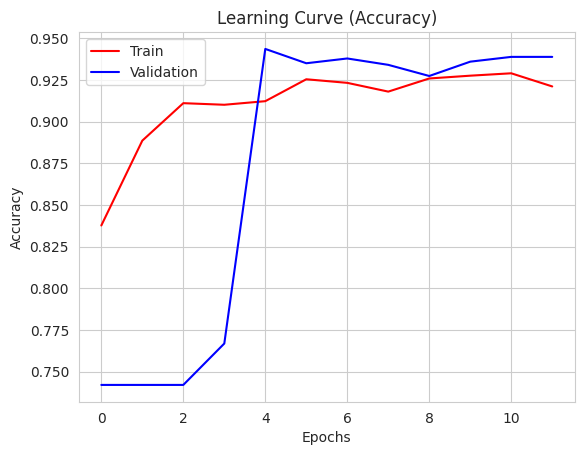

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['binary_accuracy'], color='red', label='Train')
plt.plot(history.history['val_binary_accuracy'], color='blue', label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Accuracy)')
plt.show()

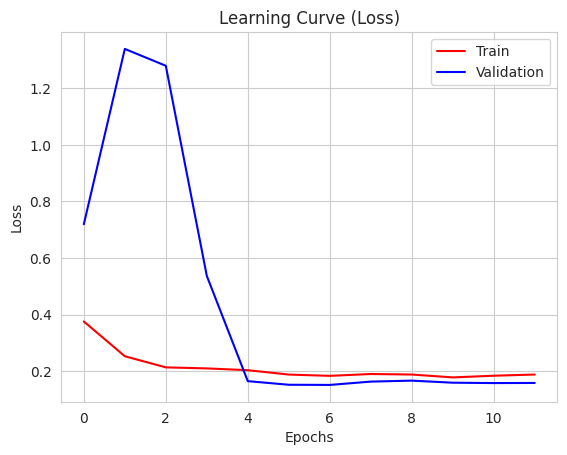

In [39]:
plt.plot(history.history['loss'], color='red', label='Train')
plt.plot(history.history['val_loss'], color='blue', label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve (Loss)')
plt.show()

In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(ds_val,steps = int(len(ds_val)/32), verbose = 0)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(ds_test,steps = len(ds_test), verbose = 0)

# Get the predicted labels and true labels for the test dataset
test_labels = ds_test.labels
predicted_labels = model.predict(ds_test)

# Flatten the predicted labels to a 1D array
predicted_labels = np.round(predicted_labels).flatten()

# Calculate evaluation metrics
cm = confusion_matrix(test_labels, predicted_labels)
classification_rep = classification_report(test_labels, predicted_labels)

# Print the evaluation metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_rep)

624/624 [==============================] - 6s 9ms/step
Validation Loss: 0.11455797404050827
Validation Accuracy: 0.9375
Test Loss: 0.3487224876880646
Test Accuracy: 0.8862179517745972
Confusion Matrix:
[[ 76 158]
 [107 283]]
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.32      0.36       234
           1       0.64      0.73      0.68       390

    accuracy                           0.58       624
   macro avg       0.53      0.53      0.52       624
weighted avg       0.56      0.58      0.56       624

